In [1]:
import pickle
from collections import OrderedDict
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# reads 3 pickle files for different seeds (now all set to 42 for testing)
seed_nums = [12, 42, 68]

D = []
for n in seed_nums: 
    with open('results_seed_{}.pickle'.format(n), 'rb') as handle:
        r = pickle.load(handle)
        D.append(r)


# mean and std data
test_acc_means = []
test_acc_stds = []
model_names =  []

# sentence length data
sl_data = []
for model in D[0].keys():
    
    # change model names and skip LSTMClassifier 
    if model == 'LSTMClassifier':
        continue
    if model == 'LSTMClassifier_mb':
        model_names.append('LSTM')
    elif model == 'TreeLSTMClassifier':
        model_names.append('N-ary Tree-LSTM')
    elif model == 'TreeLSTMClassifier_childsum':
        model_names.append('Child Sum Tree-LSTM')
    elif model == 'TreeLSTMClassifier_subtree':
        model_names.append('Tree-LSTM subtrees')
    else:
        model_names.append(model)
        
    
    
    test_accs = np.array([D[0][model]['test_accuracy'], 
                          D[1][model]['test_accuracy'], 
                          D[2][model]['test_accuracy']])
    
    test_acc_mean = np.mean(test_accs)
    test_acc_sd = np.std(test_accs)
    
    print(model,'- acc:', test_acc_mean,'- sd:', test_acc_sd)
    
    test_acc_means.append(test_acc_mean)
    test_acc_stds.append(test_acc_sd)
    sl = np.array([D[0][model]['sentence_length_results'], 
                   D[1][model]['sentence_length_results'], 
                   D[2][model]['sentence_length_results']])
    
    sl_data.append(sl)
    
model_names


BOW - acc: 0.28702865761689295 - sd: 0.02805024379136406
CBOW - acc: 0.35580693815987935 - sd: 0.01281074954303836
Deep_CBOW - acc: 0.3666666666666667 - sd: 0.010478041890170972
PT_Deep_CBOW - acc: 0.4288084464555053 - sd: 0.00428207226744447
LSTMClassifier_mb - acc: 0.46003016591251883 - sd: 0.003950467829173103
TreeLSTMClassifier - acc: 0.46425339366515833 - sd: 0.00036945546648313265
TreeLSTMClassifier_childsum - acc: 0.4686274509803921 - sd: 0.005558227985727968
TreeLSTMClassifier_subtree - acc: 0.4452488687782805 - sd: 0.00647338272515081


['BOW',
 'CBOW',
 'Deep_CBOW',
 'PT_Deep_CBOW',
 'LSTM',
 'N-ary Tree-LSTM',
 'Child Sum Tree-LSTM',
 'Tree-LSTM subtrees']

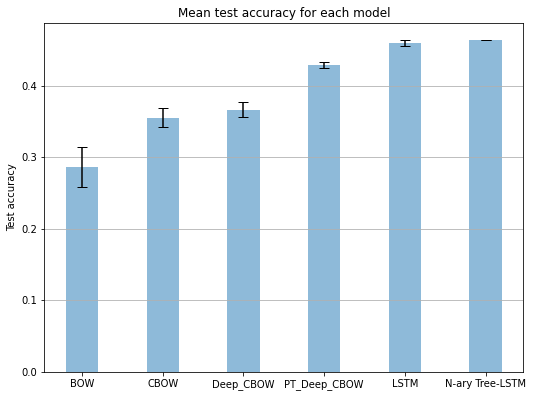

In [2]:
# plot the accuracies for the standard models
# barplot with standard deviation
x_pos = np.arange(len(model_names))
fig, ax = plt.subplots()
ax.bar(x_pos[:-2], test_acc_means[:-2], yerr=test_acc_stds[:-2],  width=0.4, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('Test accuracy')
ax.set_xticks(x_pos[:-2])
ax.set_xticklabels(model_names[:-2])
ax.set_title('Mean test accuracy for each model')
ax.yaxis.grid(True)
plt.tight_layout()
fig.set_size_inches(8, 6)
# Save the figure and show
plt.savefig('plots/accuracies.png')
plt.show()


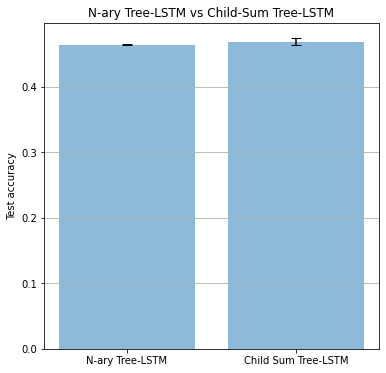

In [3]:
# plot comparison of N-ary and child sum
x_pos = np.arange(len(model_names))
fig, ax = plt.subplots()
ax.bar(x_pos[-3:-1], test_acc_means[-3:-1], yerr=test_acc_stds[-3:-1],  width=0.8, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('Test accuracy')
ax.set_xticks(x_pos[-3:-1])
ax.set_xticklabels(model_names[-3:-1])
ax.set_title('N-ary Tree-LSTM vs Child-Sum Tree-LSTM')
ax.yaxis.grid(True)
fig.set_size_inches(6, 6)
# Save the figure and show
plt.savefig('plots/nary_cs.png')
plt.show()

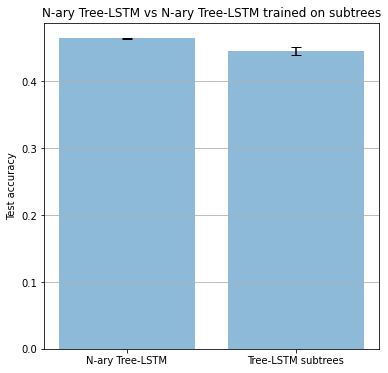

In [4]:
# plot comparison of N-ary tree and subtree
x_pos = np.arange(len(model_names))
fig, ax = plt.subplots()
ax.bar(x_pos[-3::2], test_acc_means[-3::2], yerr=test_acc_stds[-3::2],  width=1.6, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('Test accuracy')
ax.set_xticks(x_pos[-3::2])
ax.set_xticklabels(model_names[-3::2])
ax.set_title('N-ary Tree-LSTM vs N-ary Tree-LSTM trained on subtrees')
ax.yaxis.grid(True)
fig.set_size_inches(6, 6)
# Save the figure and show
plt.savefig('plots/nary_subtree.png')
plt.show()

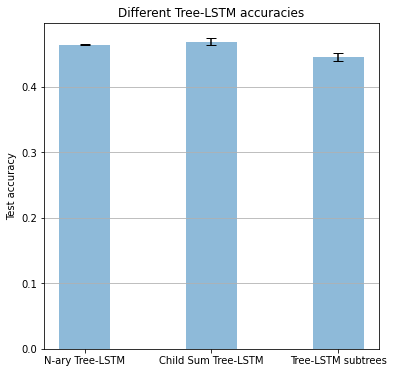

In [5]:
# plot comparison of N-ary tree and subtree
x_pos = np.arange(len(model_names))
fig, ax = plt.subplots()
ax.bar(x_pos[-3:], test_acc_means[-3:], yerr=test_acc_stds[-3:],  width=0.4, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('Test accuracy')
ax.set_xticks(x_pos[-3:])
ax.set_xticklabels(model_names[-3:])
ax.set_title('Different Tree-LSTM accuracies')
ax.yaxis.grid(True)
fig.set_size_inches(6, 6)
# Save the figure and show
plt.savefig('plots/diff_tree.png')
plt.show()

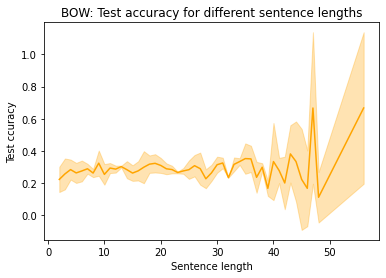

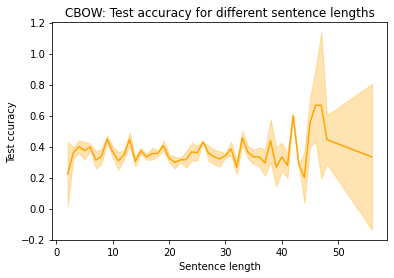

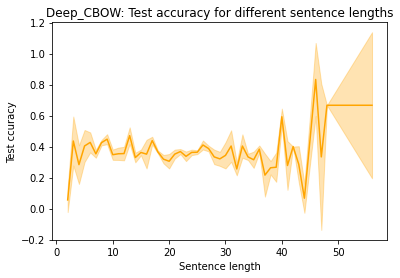

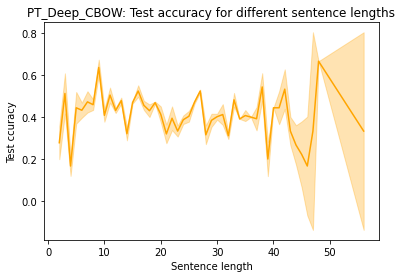

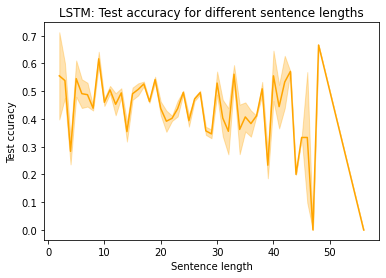

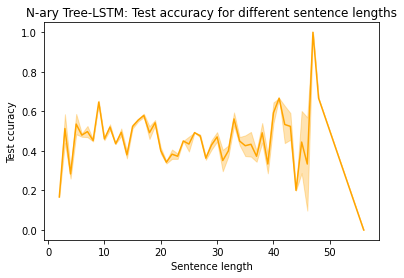

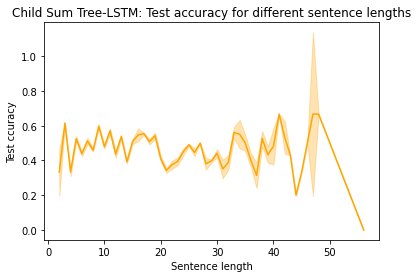

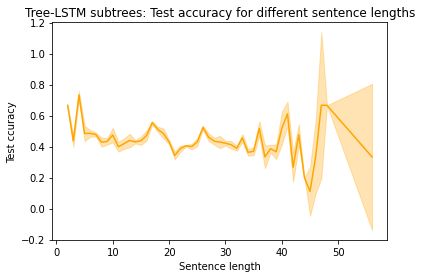

In [6]:
for i, name in enumerate(model_names):
    xs = sl_data[i][0].keys()
    accs = []
    for j in range(len(sl_data[i])):
        accs.append(list(sl_data[i][j].values()))

    accs = np.array(accs)
    mean_accs = np.mean(accs, axis=0)
    
    # random stds for testing
    #stds = np.random.rand(len(xs)) * 0.2
    stds = np.std(accs, axis=0)

    plt.figure(i)
    plt.plot(xs, mean_accs, color='orange')
    plt.fill_between(xs, mean_accs-stds, mean_accs+stds, alpha=0.3, color='orange')
    plt.xlabel('Sentence length')
    plt.ylabel('Test ccuracy')
    plt.title('{}: Test accuracy for different sentence lengths'.format(name))
    plt.savefig('plots/sl_{}.png'.format(name))
    plt.show()
    

